## Problem

Saat ini persaingan untuk bisnis online shopping semakin kompetitif. Hal ini dikarenakan tren belanja online selalu meningkat setiap tahunnya linier dengan pengguna internet yang selalu bertambah. Customer lebih banyak beralih ke sistem belanja online daripada konvensional. Maka dari itu, perusahaan harus mengerti customer intent atau keinginan yang dimiliki customer terhadap suatu produk atau layanan tertentu. Perusahaan perlu meningkatkan rate penjualan online agar memaksimalkan keuntungan



- Bagaimana perbandingan jumlah user yang melakukan transaksi dengan user yang hanya berkunjung ke website?
- Tipe user seperti apa yang cenderung melakukan transaksi?
- Region mana yang lebih banyak melakukan kunjungan website dan transaksi?
- Faktor apa yang dapat mempengaruhi revenue?
- Pada bulan apa transaksi banyak dilakukan?
- Bagaimana performa penjualan pada weekend dan weekdays?

## Goals

- Mengetahui bagaimana performa bisnis online perusahaan 
- Mengetahui perbandingan jumlah user yang melakukan transaksi dengan user yang hanya berkunjung ke website
- Mengetahui tipe user yang aktif melakukan transaksi
- Mengetahui region dengan kunjungan dan transaksi terbanyak
- Mengetahui faktor yang mempengaruhi revenue
- Mengetahui bulan dengan transaksi terbanyak dan apa yang terjadi pada bulan tersebut
- Mengetahui perbandingan performa penjualan pada weekend dan weekdays

In [391]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [392]:
#Membaca file csv dari bank.csv
df = pd.read_csv("online_shoppers_intention.csv")
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0.0,0.0,0.0,0.0,3.0,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


## Definisi Kolom

- Administrative: Jumlah halaman yang dikunjungi user untuk aktivitas terkait pengelolaan akun
- Administrative Duration: Jumlah total waktu yang dihabiskan user pada halaman pengelolaan akun
- Informational: Jumlah halaman yang dikunjungi user di website
- Informational Duration: Waktu yang dihabiskan di halaman Informasi oleh user
- Product Related: Jumlah halaman produk yang dikunjungi user
- Product Related Duration: Waktu yang dihabiskan user untuk melihat halaman Produk
- Bounce Rates: Persentase user yang langsung meninggalkan website setelah membuka landing page
- Exit Rates: Persentase user yang meninggalkan website dari halaman tertentu
- Page Values: Nilai rata-rata untuk halaman yang dikunjungi user sebelum menyelesaikan transaksi
- Special Day: Kedekatan waktu kunjungan website dengan hari khusus 
- Month: Bulan kunjungan website
- Operating Systems: Operating Systems yang digunakan user
- Browser: Browser yang digunakan user
- Region: Region user
- Traffic Type: Sumber lalu lintas tempat user memasuki website
- Visitor Type: Tipe user (New, Returning, Other)
- Weekend: Apakah user berkunjung pada akhir pekan (1) atau tidak (0)
- Revenue : Apakah user menyelesaikan pembelian (1) atau tidak (0)

## Analisa Deskriptif & Handling Missing Value serta Outliers

In [393]:
#Mengetahui dataset ada berapa baris dan berapa kolom
df.shape #Terdapat 12330 Baris dan 18 Kolom

(12330, 18)

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Tipe data untuk OperatingSystem, Browser, Region, TrafficType adalah numeric karena sudah di encode berdasarkan kategorinya

In [395]:
#Cek Missing value
df.isna().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Terdapat missing value pada kolom administrative sampai ExitRates. Maka dari itu perlu dilakukan handling

In [396]:
#Menampilkan data yang null
print(df[df.isnull().any(axis = 1)].shape)
df[df.isnull().any(axis = 1)]

(14, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,True,False
1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,2,3,Returning_Visitor,False,False


In [397]:
#Mencari modus/nilai yang paling sering muncul
df.mode()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.2,0.0,0.0,May,2,2,1,2,Returning_Visitor,False,False


Untuk melakukan handling pada kolom Administrative dapat menggunakan mode karena walaupun bertipe numerik tetapi kolom ini adalah berapa jumlah halaman yang dikunjungi user untuk aktivitas terkait pengelolaan akun. Yang berarti tidak mungkin apabila diisi dengan mean. Untuk kolom Informational dan ProductRelated juga berisikan jumlah halaman maka akan diberikan treatment yang sama dengan kolom Administrative

In [398]:
#Replace missing value dengan mode
columns = ['Administrative', 'Informational']
for i in columns :
    df[i].replace(np.nan, 0, inplace= True)

df['ProductRelated'].replace(np.nan, 1, inplace= True)

In [399]:
df[df.isnull().any(axis = 1)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1065,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
1136,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1473,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,True,False
1474,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
1475,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
1476,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,Mar,1,1,2,3,Returning_Visitor,False,False


- Sudah tidak terdapat missing value pada kolom Administrative, Informational dan ProductRelated
- Namun untuk kolom Administrative_Duration, Informational_Duration, ProductRelated_Duration, Bounce Rate dan Exit Rate masih ada value yang kosong. Missing value pada kolom ini dapat dilakukan handling dengan cara mengisi dengan nilai median karena kolom ini merupakan kolom numerikal berupa berapa lama user menghabiskan waktu untuk mengunjungi website

In [400]:
#Replace missing value dengan median
columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates']
for i in columns :
    mean=df[i].mean()
    df[i].replace(np.nan, mean, inplace= True)

In [401]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Tidak ditemukan lagi missing value

In [402]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Pada kolom durasi (Administrative_Duration, Informational_Duration dan ProductRelated_Duration) terdapat nilai negatif. Karena durasi tidak mungkin negatif, maka akan diubah ke durasi = 0

In [403]:
columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
for i in columns :
    df[i].replace(-1.0, 0, inplace= True)

In [404]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Durasi yang negatif telah diubah ke 0

In [424]:
#Describe Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.908853,176.758755,0.0,0.000000,8.000000,93.256250,3398.750000
Informational,12330.0,0.503406,1.270093,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.509064,140.744835,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.728954,44.477141,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1196.039733,1913.283611,0.0,185.287500,601.059874,1464.157213,63973.522230
BounceRates,12330.0,0.022152,0.048400,0.0,0.000000,0.003125,0.016941,0.200000
ExitRates,12330.0,0.043003,0.048500,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


- Informational/jumlah halaman yang dikunjungi user di website berkisar 0 (tidak mengunjungi) - 24 halaman
- ProductRelated/Jumlah halaman produk yang dikunjungi user berkisar 0 (tidak mengunjungi) - 705 halaman
- Rata - rata ProductRelated_Duration/Durasi kunjungan user pada halaman produk adalah 1196 detik atau ~ 20 menit
- BounceRates dan ExitRates antara 0 - 20% yaitu berada dalam range bad (sumber : https://www.gorocketfuel.com/the-rocket-blog/whats-the-average-bounce-rate-in-google-analytics/#:~:text=As%20a%20rule%20of%20thumb,%2C%20news%2C%20events%2C%20etc)
- SpecialDay dengan nilai 0 (bukan hari khusus) dan 1 (hari khusus)
- Terdapat 8 tipe operating system yang digunakan user
- Terdapat 13 tipe browser yang digunakan user untuk mengakses web
- Website dikunjungi oleh user di 9 region berbeda

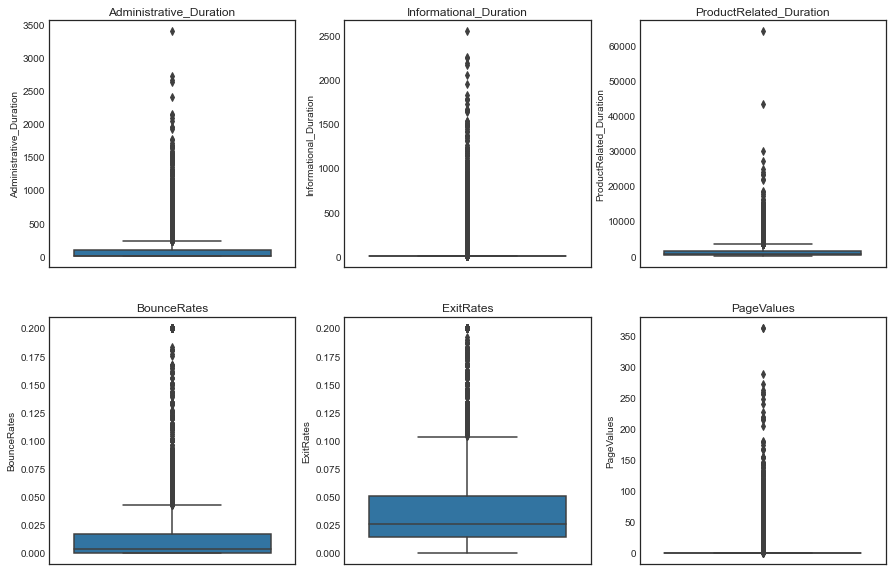

In [407]:
#Outliers
columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
plt.figure(figsize = (15, 10))
x = 1
for i in columns:
    ax = plt.subplot(2, 3, x)
    sns.boxplot(df[i], orient = 'v')
    ax.set_title(i)
    x += 1

Terdapat banyak outlier pada kolom - kolom diatas, namun tidak dilakukan handling karena data tersebut merupakan behaviour user sehingga data tersebut dapat digunakan sebagai bahan analisis

## Analisis dan Visualisasi Data

In [408]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [409]:
total_revenue = pd.crosstab(index = df['Revenue'], columns = 'Jumlah')
total_revenue

col_0,Jumlah
Revenue,
False,10422
True,1908


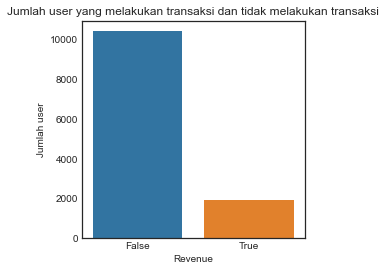

In [410]:
plt.figure(figsize=(4,4))
fig = sns.countplot(x = df['Revenue'])
fig.set(xlabel='Revenue', ylabel='Jumlah user')
fig.set_title("Jumlah user yang melakukan transaksi dan tidak melakukan transaksi")
plt.show()

Jumlah user yang tidak melakukan transaksi pada saat berkunjung ke website lebih banyak daripada yang melakukan transaksi. Untuk melihat berapa persen user yang melakukan transaksi dan tidak dapat dilihat pada pie chart dibawah

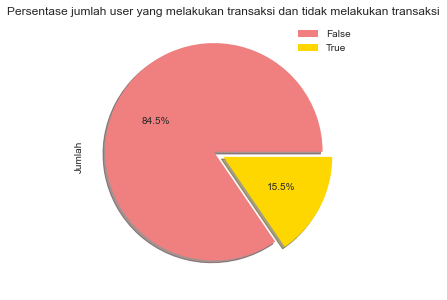

In [411]:
total_revenue['Jumlah'].plot(kind = 'pie', figsize = (5,5), autopct = '%1.1f%%', shadow = True, labels = None,
                             colors = ['lightcoral','gold'], explode = [0.1,0])
plt.title('Persentase jumlah user yang melakukan transaksi dan tidak melakukan transaksi')
plt.legend(labels = total_revenue.index, loc = 'upper right')
plt.show()

Sebanyak 84% user memilih untuk hanya melihat-lihat produk dibanding membeli/melakukan transaksi

In [412]:
visitor = pd.crosstab(index = df['VisitorType'], columns=df['Revenue'])
visitor['Total'] = visitor[0] + visitor[1]
visitor

Revenue,False,True,Total
VisitorType,,,
New_Visitor,1272,422,1694
Other,69,16,85
Returning_Visitor,9081,1470,10551


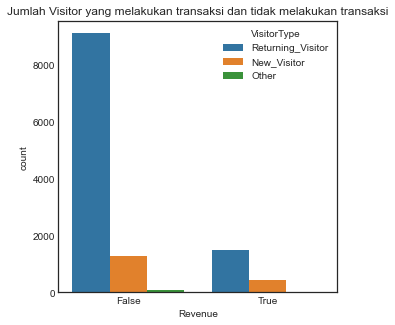

In [413]:
plt.figure(figsize=(5,5))
fig = sns.countplot(x=df['Revenue'], hue = df['VisitorType'])
plt.title("Jumlah Visitor yang melakukan transaksi dan tidak melakukan transaksi")
plt.show()

- Returning visitor banyak yang hanya melihat-lihat produk daripada melakukan transaksi, namun returning visitor ini juga lebih banyak melakukan transaksi dibandingkan dengan user lainnya
- New Visitor (pengunjung baru) pada website kurang tertarik dengan produk yang ada sehingga jumlah Revenue False masih lebih banyak dibanding True

In [414]:
pd.crosstab(index = df['Region'], columns=df['Revenue'])

Revenue,False,True
Region,,
1,4009,771
2,948,188
3,2054,349
4,1007,175
5,266,52
6,693,112
7,642,119
8,378,56
9,425,86


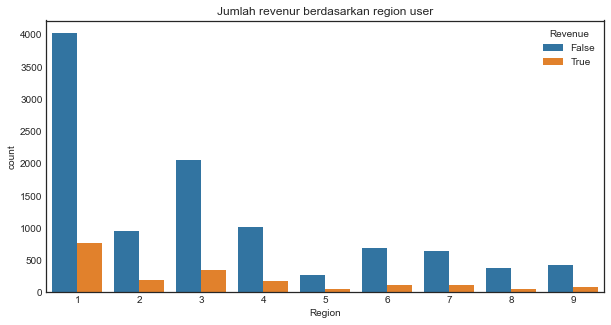

In [415]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x = df['Region'], hue = df['Revenue'])
plt.title("Jumlah revenur berdasarkan region user")
plt.show()

Region 1 menjadi visitor website dan pembeli (user yang melanjutkan transaksi) terbanyak

In [416]:
pd.crosstab(index = df['ProductRelated_Duration'], columns=df['Revenue']).transpose()

ProductRelated_Duration,0.000000,0.500000,1.000000,2.333333,2.666667,3.000000,4.000000,5.000000,5.333333,6.000000,...,21672.244250,21857.046480,23050.104140,23342.082050,23888.810000,24844.156200,27009.859430,29970.465970,43171.233380,63973.522230
Revenue,,,,,,,,,,,,,,,,,,,,,
False,739,1,2,1,1,4,10,12,1,5,...,0,1,1,1,1,1,0,1,1,1
True,13,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


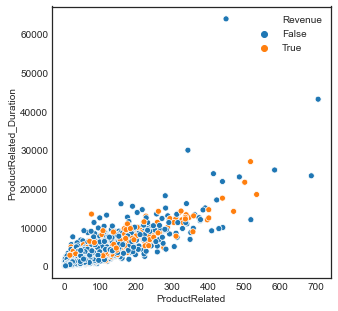

In [417]:
plt.figure(figsize=(5,5))
sns.scatterplot(x = df['ProductRelated'], y=df['ProductRelated_Duration'], hue=df['Revenue'])

- Terdapat korelasi positif antara ProductRelated (jumlah halaman produk yang dikunjungi user) dengan ProductRelated_Duration (waktu yang dihabiskan user untuk melihat halaman produk). Semakin banyak halaman produk yang dibuka maka akan semakin lama user menghabiskan waktu untuk melihat halaman produk

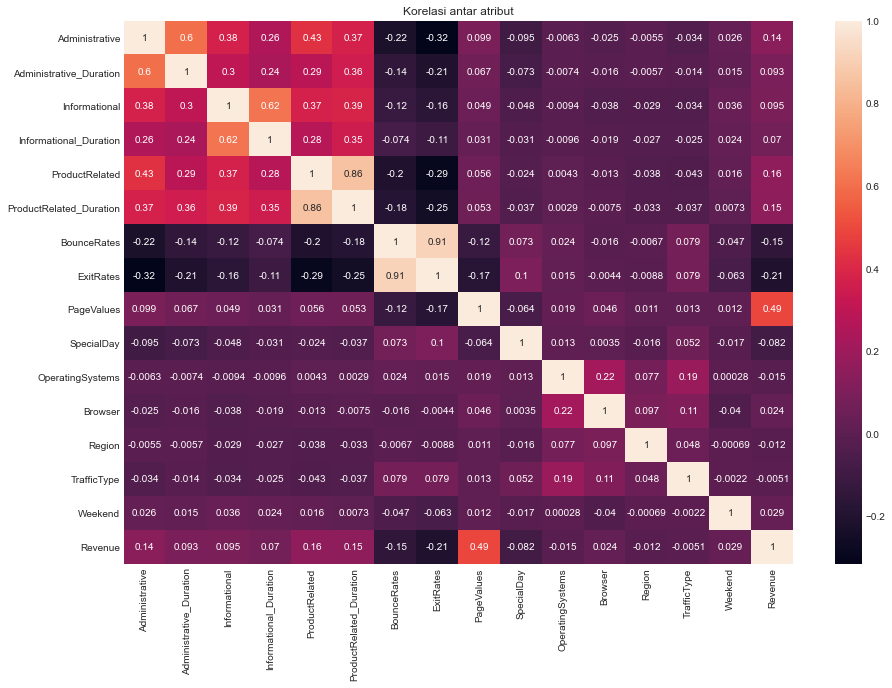

In [418]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)
plt.title("Korelasi antar atribut")
plt.show()

Dapat dilihat bahwa Administrative, ProductRelated, ProductRelated_Duration, PageValues mempengaruhi revenue. 

- PageValues merupakan rata - rata halaman yang dikunjungi user sebelum menyelesaikan transaksi, sudah jelas bahwa user tersebut akan melakukan transaksi
- Semakin banyak jumlah halaman produk yang dikunjungi user (ProductRelated) maka akan semakin besar kemungkinan user akan melakukan transaksi
- Semakin lama durasi user dalam melihat halaman produk maka akan semakin besar kemungkinan user tertarik untuk melakukan transaksi
- Semakin banyak jumlah halaman yang dikunjungi user untuk aktivitas terkait pengelolaan akun (Administrative) maka user tersebut dapat dikatakan sebagai user aktif dan kemungkinan besar akan melakukan transaksi

Berbeda dengan ExitRates dan BounceRates yang memiliki korelasi negatif
- Semakin tinggi ExitRates maka user tidak akan melakukan transaksi
- Semakin tinggi BounceRates maka user tidak akan melakukan transaksi

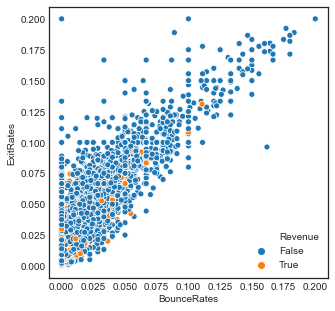

In [419]:
plt.figure(figsize=(5,5))
sns.scatterplot(x = df['BounceRates'], y=df['ExitRates'], hue=df['Revenue'])

Halaman yang memiliki BounceRates tinggi cenderung memiliki ExitRates yang tinggi sehingga kebanyakan user tampaknya tidak tertarik pada website dan memilih untuk tidak melanjutkan transaksi

In [420]:
pd.crosstab(index = df['Month'], columns=df['Revenue'])

Revenue,False,True
Month,,
Aug,357,76
Dec,1511,216
Feb,181,3
Jul,366,66
June,259,29
Mar,1715,192
May,2999,365
Nov,2238,760
Oct,434,115


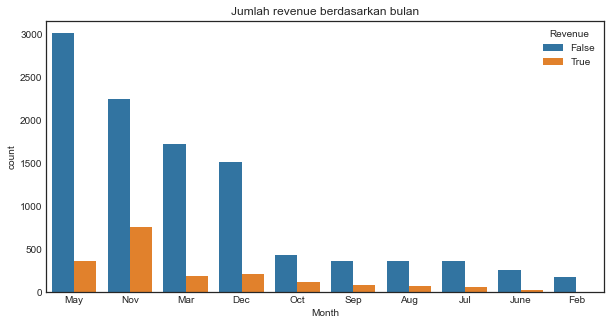

In [421]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x = df['Month'], hue = df['Revenue'], order = df['Month'].value_counts().index)
plt.title("Jumlah revenue berdasarkan bulan")
plt.show(fig)

User yang melakukan transaksi tidak sebanyak user yang hanya melihat - lihat website. Namun, pada bulan mei terdapat kenaikan jumlah kunjungan user sedangkan untuk bulan yang paling banyak terjadi transaksi adalah Mei, November dan Desember

In [422]:
pd.crosstab(index = df['Weekend'], columns=df['Revenue'])

Revenue,False,True
Weekend,,
False,8053,1409
True,2369,499


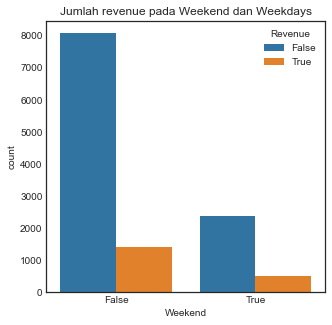

In [423]:
plt.figure(figsize=(5,5))
fig = sns.countplot(x = df['Weekend'], hue = df['Revenue'])
plt.title("Jumlah revenue pada Weekend dan Weekdays")
plt.show()

Kunjungan website dan transaksi lebih banyak terjadi pada weekdays

## Kesimpulan

- Hanya sekitar ~15% user yang melanjutkan transaksi saat mengunjungi website
- Returning visitor cenderung lebih suka mengunjungi website tanpa melakukan transaksi
- Kurangnya antusias new visitor dalam melakukan transaksi
- Region 1 menjadi visitor website dan pembeli (user yang melanjutkan transaksi) terbanyak
- ProductRelated (jumlah halaman produk yang dikunjungi) mempengaruhi lama user menghabiskan waktu untuk melihat halaman produk
- Semakin banyak jumlah halaman produk yang dikunjungi user (ProductRelated) maka akan semakin besar kemungkinan user akan melakukan transaksi
- Semakin banyak jumlah halaman yang dikunjungi user untuk aktivitas terkait pengelolaan akun (Administrative) maka user tersebut dapat dikatakan sebagai user aktif dan kemungkinan besar akan melakukan transaksi
- ExitRates dan BounceRates yang tinggi menyebabkan tidak terjadinya transaksi
- Bulan mei terdapat kenaikan jumlah kunjungan user sedangkan untuk bulan yang paling banyak terjadi transaksi adalah Mei, November dan Desember. Pada bulan mei terdapat hari libur nasional Atatürk Remembrance and Youth & Sports Day. Untuk November dan Desember merupakan akhir tahun yang dimana merupakan musim liburan dan user akan cenderung konsumtif
- Kunjungan website dan transaksi lebih banyak terjadi pada weekdays

## Saran dan Rekomendasi
- Fokus pada peningkatan user experience sehingga user dapat mengeksplor website lebih lama, melihat tampilan website yang bagus hingga melakukan transaksi
- Mengaplikasikan recommender system agar produk yang user minati akan otomatis tampil pada website sehingga meningkatkan ketertarikan user untuk melakukan transaksi dan hal ini juga dapat mengurangi BounceRates dan ExitRates
- Memperluas varian produk dan untuk segala kalangan user
- Melakukan penawaran atau event menarik yang disampaikan ke email user (terutama returning visitor) maupun iklan pada website terutama untuk region 1 dengan user yang melakukan transaksi terbanyak
- Memperluas jangkauan pasar (region) untuk menambah user
- Pada saat weekend perbanyak melakukan update konten/produk